In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report


In [2]:
df = pd.read_csv('../YouTubeDatasets/creditcard.csv',index_col=0)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 284807 entries, 0.0 to 172792.0
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22 

In [5]:
df.isnull().sum()

## no null values
## no object type column

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.isnull().values.any()

False

In [8]:
cols = list(df.columns)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [9]:
X = df.drop("Class",axis=1)
y = df['Class']

X.shape, y.shape

((284807, 29), (284807,))

In [11]:
values = df.Class.value_counts()
values

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

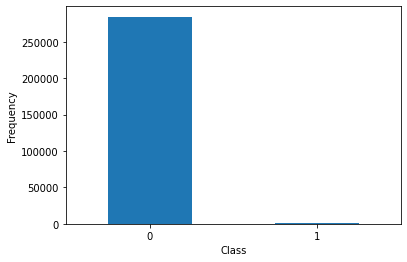

In [14]:
values.plot(kind='bar',rot=0)
plt.xlabel("Class")
plt.ylabel("Frequency")


In [15]:

## the data is highly imbalanced
## since many of the values are 0 only different

## since total 1s are 492
## so lets take equal 492 0s also

## so total shape will be 894 (492+492)


## UnderSampling

The feature with max counts, we reduce it to the count equal to that of lower count variable

In [23]:

from imblearn.under_sampling import RandomUnderSampler 

nm=RandomUnderSampler(random_state=42)
x_res_under,y_res_under = nm.fit_resample(X,y)


In [24]:
x_res_under.shape, y_res_under.shape

## see the shape of botth are matched now

((984, 29), (984,))

In [27]:
from collections import Counter

print(Counter(y))
print(Counter(y_res_under))


Counter({0: 284315, 1: 492})
Counter({0: 492, 1: 492})


In [17]:
Counter(df.Class)

Counter({0: 284315, 1: 492})

## Oversampling
Its opposite of undersampling

In [29]:
from imblearn.over_sampling import RandomOverSampler

## you can use sampling_strategy='minority' or give it a ratio
os = RandomOverSampler(sampling_strategy='minority')
x_res_over,y_res_over = os.fit_resample(X,y) 
x_res_over.shape, y_res_over.shape


((568630, 29), (568630,))

In [30]:
print(Counter(y))
Counter(y_res_over)

Counter({0: 284315, 1: 492})


Counter({0: 284315, 1: 284315})